In [1]:
import sys
import matplotlib.pyplot as plt
import numpy as np
from astropy import units as u
from torch.utils.data import DataLoader
# import train test split
from sklearn.model_selection import train_test_split

In [2]:
sys.path.append('dev/')
from dev.yso_model_loaders import S___SMI, SPUBHMI
from dev.spectrum_net import reshape_spectral_aperture_data, SpectrumPredictor

In [3]:
base_path_yso = '/Users/ratzenboe/Documents/work/data_local/spectal_models/yso_models/models_richardson24/'
# yso_model = S___SMI(base_path_yso + 's---smi')
yso_model = SPUBHMI(base_path_yso + 'spubhmi')

Loading SPUBHMI model...
SPUBHMI model loaded.


In [4]:
X_star = yso_model.X_input
distance_pc = np.full(X_star.shape[0], fill_value=1000.) * u.pc
fnu = yso_model.sed
wave = yso_model.wave
aperture = yso_model.apertures
# Transform the spectra to flam
flam = yso_model.transform_sed(yso_model.y_output, distance_pc)

In [5]:
# plt.loglog(wave, flam[0].T);

In [6]:
X_full, Y_full = reshape_spectral_aperture_data(X_star, flam.value, aperture.value)
X_full[:, -1] = np.log10(X_full[:, -1])

X_train, X_val, y_train, y_val = train_test_split(
    X_full, Y_full, test_size=0.1, random_state=42, shuffle=True
)

In [7]:
predictor = SpectrumPredictor(
    input_dim=X_train.shape[-1], output_dim=Y_full.shape[-1],
    hidden_dims=(1024, 1024), dropout=0.1
)
# predictor.train_model(
#     X_train, y_train,
#     X_val=X_val, Y_val=y_val,
#     n_epochs=100, batch_size=2**13
# )

In [27]:
predictor.load('checkpoints/spectrum_predictor_epoch-4.pt')

In [28]:
predictor.input_std, predictor.input_mean, predictor.y_std, predictor.y_mean

(array([ 0.86748601,  0.33881776,  2.20341998, 25.9909983 ,  2.0192671 ,
         0.56893095,  0.0868728 ,  0.57703786,  0.37531511,  2.21492815,
         0.28830197, 17.28634833,  0.86576753,  1.21398587]),
 array([  0.50211002,   3.89186849,   1.52638771,  44.64309321,
         -4.49698578,   2.66637381,   1.14991855,  -1.00189224,
          0.64915972, -20.19246246,   1.50323157,  29.9280403 ,
        -21.49213252,   3.9999455 ]),
 array([2.12792576e+00, 2.12829539e+00, 2.12863194e+00, 2.12894707e+00,
        2.12922615e+00, 2.12946073e+00, 2.12967327e+00, 2.12983293e+00,
        2.12998380e+00, 2.13009538e+00, 2.13017392e+00, 2.13022734e+00,
        2.13026714e+00, 2.13025767e+00, 2.13025364e+00, 2.13020100e+00,
        2.13012818e+00, 2.13004817e+00, 2.12995437e+00, 2.12985089e+00,
        2.12970084e+00, 2.12955262e+00, 2.12935649e+00, 2.12919768e+00,
        2.12896497e+00, 2.12869429e+00, 2.12841435e+00, 2.12809387e+00,
        2.12771464e+00, 2.12736391e+00, 2.12695532e+00, 2.

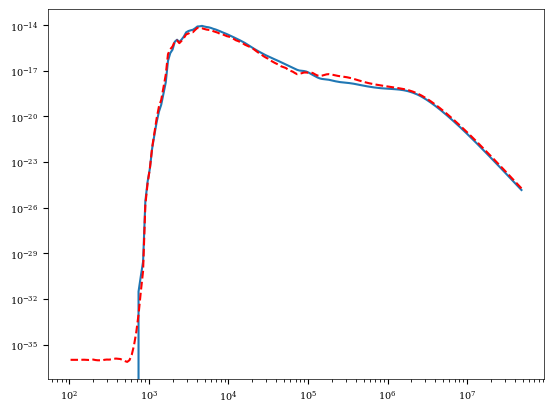

In [46]:
idx = np.random.choice(X_val.shape[0])
eps = np.random.normal(0, 1, X_val.shape[-1]) * 1e-3
f_pred = predictor.predict_flux(X_val[idx] + eps)

plt.loglog(wave, y_val[idx])
plt.loglog(wave, f_pred, 'r--');

In [76]:
X_val.shape

(19998, 4)

2.668833524829301e-10